# SIT744 Assignment 2: Transfer learning and Efficient Training of Deep Learning Models 

<div class="alert-info">
    <p>Due: <strong>8:00pm 17 May 2021</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~15%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to achieve better image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~1%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [1]:
# Producing the Assignment-1, DNN 

import tensorflow as tf
import tensorflow_datasets
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History


# Loading the data using tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# train, test and validation splits

train_images = train_images / 255.0
test_images = test_images / 255.0

# defining batch size
BATCH_SIZE = 512

# training dataset
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))


# test dataset
fmnist_test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
fmnist_test_ds = fmnist_test_ds.shuffle(5000).batch(BATCH_SIZE)

# picking out the validation set from the training dataset
fmnist_train = fmnist_train_ds.take(round(len(train_labels)*0.7))
fmnist_val = fmnist_train_ds.skip(round(len(train_labels)*0.7))

from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val  = train_test_split(train_images, train_labels, test_size=0.25, random_state=1) 

#fmnist_train_ds = fmnist_train_ds.values.reshape(-1,28,28,1)
#X_val = X_val.values.reshape(-1,28,28,1)


# batch size should be in powers of 2 and the larger the better, provided that the batch fits into the (GPU) memory;
# small batches can offer a regularizing effect, perhaps due to the noise they add to the learning process.
# larger batches provide a more accurate estimate of the gradient.
# the batch size here is 512.
# train-data shuffling ensures that the model gets to see all permutauions of input in every batch.

In [ ]:
# adding dropout, batch normalisation, changing the learning rate

def optimiser_sgd(learning_rate):
  learning_rate = learning_rate
  decay_rate = learning_rate / 50
  momentum = 0.8

  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  return sgd

In [ ]:

decay_rate = 0.001
learning_rate = 0.001

def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

In [ ]:
# Different layers are appropriate for different tensor formats and different types of data processing. 
# Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers.

# single-label, multiclass classification problem

model_d = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model_d.compile(optimizer=optimiser_sgd(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/12
83/83 [==============================] - 4s 14ms/step - loss: 4.4890 - accuracy: 0.2610 - val_loss: 4.0670 - val_accuracy: 0.5698
Epoch 2/12
83/83 [==============================] - 1s 6ms/step - loss: 3.4570 - accuracy: 0.6588 - val_loss: 3.5789 - val_accuracy: 0.6957
Epoch 3/12
83/83 [==============================] - 1s 7ms/step - loss: 3.2030 - accuracy: 0.7196 - val_loss: 3.2590 - val_accuracy: 0.7336
Epoch 4/12
83/83 [==============================] - 1s 7ms/step - loss: 3.0703 - accuracy: 0.7427 - val_loss: 3.0617 - val_accuracy: 0.7582
Epoch 5/12
83/83 [==============================] - 1s 7ms/step - loss: 2.9613 - accuracy: 0.7660 - val_loss: 2.9313 - val_accuracy: 0.7744
Epoch 6/12
83/83 [==============================] - 1s 7ms/step - loss: 2.8784 - accuracy: 0.7783 - val_loss: 2.8379 - val_accuracy: 0.7850
Epoch 7/12
83/83 [==============================] - 1s 7ms/step - loss: 2.8132 - accuracy: 0.7859 - val_loss: 2.7666 - val_accuracy: 0.7955
Epoch 8/12
83/83 [=

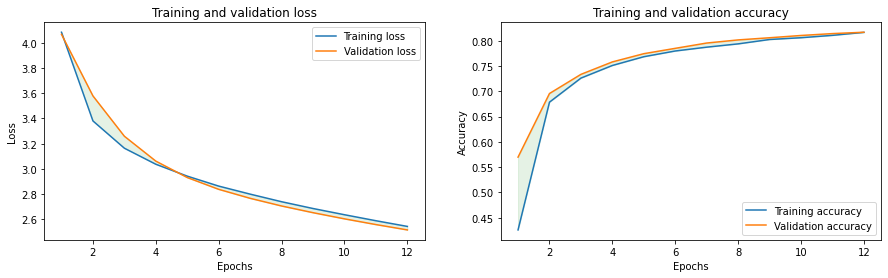

In [ ]:
regularised_layers_model_history = model_d.fit(train_images, 
                                     train_labels,
                                     validation_split=0.3,
                                     batch_size=512,
                                     epochs=12,
                                    callbacks = callbacks_list)

acc = regularised_layers_model_history.history['accuracy']
val_acc = regularised_layers_model_history.history['val_accuracy']
loss = regularised_layers_model_history.history['loss']
val_loss = regularised_layers_model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model_d.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset using densly connected model:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.5341 - accuracy: 0.8118
Accuracy on test dataset after layer specific weight regularisation: 0.8118000030517578


Without changine the model architecture, the accuracy on the test set does not show any improvement, although it improves only by a few decimal poitns on the validation set, depending on the learning rate, the regularisers and the Dropouts. The highest reported accuracy in Assignment-1 was 0.8915, any changes in the hyper-parameters result in a decreased accuracy on the test set, as shown above where the values of the kernel_regulariers and the optimiser were changed.

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [3]:
# reshaping the data for ConvNet

train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
print(train_images.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
#train_images = train_images.values.reshape(-1,28,28,1)

(60000, 28, 28, 1)


In [4]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


# defining a Convolutional Network
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = Adam(lr=0.0001, decay=1e-6)


model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
print(model.summary())
init_weights = model.get_weights()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [ ]:
# implementing Early stopping to stop training once the model performance stops improving on a hold out validation dataset
# implementing ReduceLROnPlateau, a callback that monitors the validation loss (in this case) and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

Epoch 1/100
329/329 [==============================] - 52s 70ms/step - loss: 1.0947 - accuracy: 0.6246 - val_loss: 1.3367 - val_accuracy: 0.5534
Epoch 2/100
329/329 [==============================] - 22s 67ms/step - loss: 0.4972 - accuracy: 0.8154 - val_loss: 0.4240 - val_accuracy: 0.8452
Epoch 3/100
329/329 [==============================] - 22s 67ms/step - loss: 0.4028 - accuracy: 0.8521 - val_loss: 0.3441 - val_accuracy: 0.8746
Epoch 4/100
329/329 [==============================] - 22s 68ms/step - loss: 0.3590 - accuracy: 0.8681 - val_loss: 0.3285 - val_accuracy: 0.8833
Epoch 5/100
329/329 [==============================] - 22s 67ms/step - loss: 0.3219 - accuracy: 0.8797 - val_loss: 0.2983 - val_accuracy: 0.8931
Epoch 6/100
329/329 [==============================] - 22s 68ms/step - loss: 0.3065 - accuracy: 0.8843 - val_loss: 0.2875 - val_accuracy: 0.8979
Epoch 7/100
329/329 [==============================] - 22s 68ms/step - loss: 0.2882 - accuracy: 0.8936 - val_loss: 0.2667 - val_ac

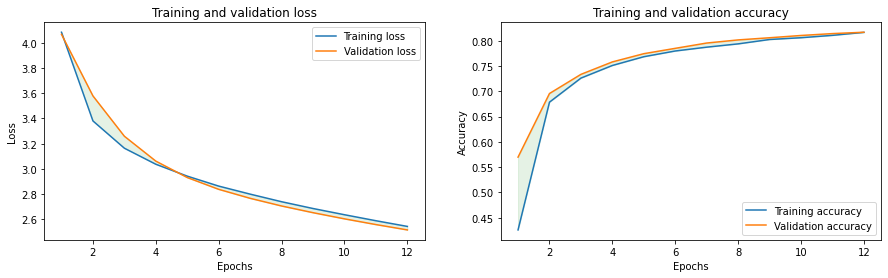

In [ ]:
history = model.fit(train_images, 
                    train_labels,
                    validation_split=0.3,
                    batch_size=128,
                    epochs=25,
                    callbacks=[reduce_lr])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset after using CNN:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.4265 - accuracy: 0.9324
Accuracy on test dataset after layer specific weight regularisation: 0.9323999881744385


After using a CNN model, the accuracy over the test set increases to 0.9324 without much hyperparameter tuning.


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [5]:
# data augumentation, using Keras ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.set_weights(init_weights)


train_datagen = ImageDataGenerator( 
        rotation_range=10,        # randomly rotate between 0-rotation_range angle
        width_shift_range=0.2,    # randomly shift horizontally by this much
        height_shift_range=0.2,   # randomly shift vertically by this much
        shear_range=0.2,          # randomly shear by this much
        zoom_range=0.2,           # randomly zoom (80% - 120%)
        horizontal_flip=True,
        fill_mode='nearest'       # fill any pixels lost in xform with nearest
    )

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

#train_datagen.fit(X_train)

# fit the data generator on training data & validate on
num_train_batches = len(X_train) // 32
num_train_batches += (0 if len(X_train) % 32 == 0 else 1)     
num_val_batches = len(X_val) // 32
num_val_batches += (0 if len(X_val) % 32 == 0 else 1)     
num_test_batches = len(test_images) // 32
num_test_batches += (0 if len(test_images) % 32 == 0 else 1)    

train_generator = train_datagen.flow(X_train, y_train, 
                                      batch_size=32,
                                      seed=123)
val_generator = val_datagen.flow(X_val, y_val, 
                                      batch_size=32,
                                      seed=123)
test_generator = test_datagen.flow(test_images, test_labels, 
                                    batch_size=32,
                                    seed=123)

# history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),
#                     validation_data =  (X_val,y_val),
#                     epochs=100,
#                     callbacks=[reduce_lr],
#                     shuffle=True)  

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def augment(image,label):
  image = tf.image.convert_image_dtype(image, tf.float32) 
  image = tf.image.random_flip_left_right(image)
  image = tf.image.resize(image, (28, 28))
  image = tf.image.resize_with_pad(image, 28 + 6, 28 + 6) # Add pixels of padding
  image = tf.image.random_crop(image, size=[28, 28, 3]) # Random crop back to IMAGE_SIZExIMAGE_SIZE
  return image, label

augmented_train_batches = (
    fmnist_train_ds
    .cache()
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(32)
    .prefetch(AUTOTUNE)
)

In [6]:
!pip install -U tensorboard_plugin_profile


     |████████████████████████████████| 1.2MB 24.6MB/s 


In [ ]:
# Profiling the input pipeline to identify the most time-consuming operation
# Training the model for the same number of epochs

!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs"
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id)

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir,
        histogram_freq=1,
         write_graph=True, 
         write_images=True,
         profile_batch = '15,25'
    )
]


# reset the training
model.set_weights(init_weights)

history = model.fit(train_generator,
                    steps_per_epoch = num_train_batches, 
                    epochs = 125,
                    validation_data = (val_generator),
                    validation_steps = num_val_batches,
                    batch_size=512,
                    callbacks=[callbacks],
                    shuffle=True)  


Epoch 1/125
1407/1407 [==============================] - 22s 16ms/step - loss: 0.8901 - accuracy: 0.6657 - val_loss: 0.5394 - val_accuracy: 0.7903
Epoch 2/125
1407/1407 [==============================] - 21s 15ms/step - loss: 0.6364 - accuracy: 0.7546 - val_loss: 0.4852 - val_accuracy: 0.8144
Epoch 3/125
1407/1407 [==============================] - 21s 15ms/step - loss: 0.5608 - accuracy: 0.7860 - val_loss: 0.4368 - val_accuracy: 0.8281
Epoch 4/125
1406/1407 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.8065

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset after data augmentation:', test_accuracy)

After using data augumentation, for the training process, the accuracy of the model on the test set becomes: 

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=logs

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~3%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [ ]:
# using VGG16 for transfer learning
# reshaping data as that required for VGG16

from keras.utils import to_categorical


# Convert the images into 3 channels
train_images=np.dstack([train_images] * 3)
test_images=np.dstack([test_images]* 3)

train_images = train_images.reshape(-1, 28,28,3)
test_images= test_images.reshape (-1,28,28,3)

# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img

train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_images])


#train_images= train_images / 255.
#test_images = test_images / 255.
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
# initialising the model
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.layers import Activation, Dense

IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

model_vgg16= VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
model_vgg16.summary()



In [ ]:
for layer in model_vgg16.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in model_vgg16.layers:
    print(layer, layer.trainable)

In [ ]:
# training on VGG16 without fine-tuning

model= Sequential()

model.add(model_vgg16)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['acc'])

In [ ]:
history = model.fit(train_images, train_labels_one_hot,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_split=0.3)



In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


test_loss, test_accuracy = model.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset after using Transfer learning (VGG16) and without fine tuning:', test_accuracy)

In [ ]:
# using VGG16 with fine-tuning

model_vgg16.trainable = True

set_trainable = False
for layer in model_vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model= Sequential()

model.add(model_vgg16)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

In [ ]:
ft_history = model.fit(train_images, train_labels_one_hot,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_split=0.3)

acc = ft_history.history['accuracy']
val_acc = ft_history.history['val_accuracy']
loss = ft_history.history['loss']
val_loss = ft_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset after using Transfer learning (VGG16) and with fine tuning:', test_accuracy)

### Task 1.5 Performance comparison

*(weight ~3%)*

How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?


Which setting achieved higher accuracy? Why did it work better for this problem? 

Have we benefitted from using the pretrained model?


The neural network was trained using transfer learning. For the purpose of transfer learning, VGG16 was used which is a .... it containes 10 classes and has been trained on 1999 images. It was chosen for this problem as it has a similar  single-label multiclass classification problem.
First setting: Using VGG16 without fine-tuning, number of trainable parameters: 
Second setting: Using VGG16 with fine-tuning, number of trainable parameters: 

## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
import os

print(tf.__version__)
print(tf.keras.__version__)
if 'COLAB_TPU_ADDR' in os.environ: 
    print('Connected to TPU') 
elif tf.test.gpu_device_name() is not '': 
    print('Connected to GPU ' + tf.test.gpu_device_name())
else:
    print('Neither connected to a TPU nor a GPU')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

2.4.1
2.4.0
Connected to GPU /device:GPU:0
Fri May 14 14:53:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    58W / 149W |    124MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                             

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX/255.0
testX = testX/255.0


print ("number of training examples = " + str(trainX.shape[0]))
print ("number of test examples = " + str(testX.shape[0]))
print ("X_train shape: " + str(trainX.shape))
print ("Y_train shape: " + str(trainY.shape))
print ("X_test shape: " + str(testX.shape))
print ("Y_test shape: " + str(testY.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(trainX, trainY,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_split=0.3)



Epoch 1/50
274/274 [==============================] - 34s 19ms/step - loss: 2.1008 - accuracy: 0.2378 - val_loss: 1.7581 - val_accuracy: 0.3923
Epoch 2/50
274/274 [==============================] - 5s 17ms/step - loss: 1.7008 - accuracy: 0.3992 - val_loss: 1.6232 - val_accuracy: 0.4289
Epoch 3/50
274/274 [==============================] - 5s 17ms/step - loss: 1.5581 - accuracy: 0.4479 - val_loss: 1.5096 - val_accuracy: 0.4663
Epoch 4/50
274/274 [==============================] - 5s 16ms/step - loss: 1.4585 - accuracy: 0.4889 - val_loss: 1.4383 - val_accuracy: 0.4935
Epoch 5/50
274/274 [==============================] - 5s 17ms/step - loss: 1.3784 - accuracy: 0.5148 - val_loss: 1.3992 - val_accuracy: 0.5089
Epoch 6/50
274/274 [==============================] - 5s 17ms/step - loss: 1.3054 - accuracy: 0.5409 - val_loss: 1.3190 - val_accuracy: 0.5327
Epoch 7/50
274/274 [==============================] - 5s 17ms/step - loss: 1.2443 - accuracy: 0.5643 - val_loss: 1.3110 - val_accuracy: 0.539

NameError: ignored

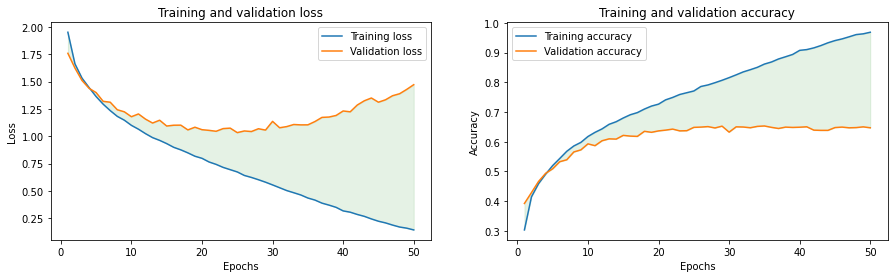

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K

In [ ]:
# model has been taken from

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'same', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def ResNet50(input_shape=(32, 32, 3), classes=10):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', padding = 'same', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (32, 32, 3), classes = 10)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(trainX, trainY, epochs = 25, batch_size = 128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 34s 105ms/step - loss: 2.6798 - accuracy: 0.2709 - val_loss: 9.2174 - val_accuracy: 0.1005
Epoch 2/25
274/274 [==============================] - 28s 102ms/step - loss: 1.7045 - accuracy: 0.4206 - val_loss: 2.9059 - val_accuracy: 0.4373
Epoch 3/25
274/274 [==============================] - 27s 100ms/step - loss: 1.4073 - accuracy: 0.5152 - val_loss: 1.6513 - val_accuracy: 0.4373
Epoch 4/25
274/274 [==============================] - 28s 100ms/step - loss: 1.3752 - accuracy: 0.5265 - val_loss: 1.4069 - val_accuracy: 0.5225
Epoch 5/25
274/274 [==============================] - 28s 101ms/step - loss: 1.0728 - accuracy: 0.6206 - val_loss: 1.0812 - val_accuracy: 0.6157
Epoch 6/25
274/274 [==============================] - 28s 101ms/step - loss: 0.9405 - accuracy: 0.6697 - val_loss: 1.1847 - val_accuracy: 0.6005
Epoch 7/25
274/274 [==============================] - 28s 100ms/step - loss: 0.7962 - accuracy: 0.7250 - val_loss: 1.0408 - val_ac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)



NameError: ignored

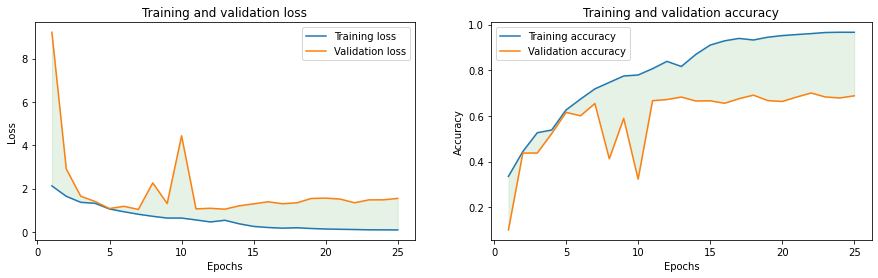

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also, Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(trainX, trainY, epochs = 50, batch_size = 128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 31s 102ms/step - loss: 4.3708 - accuracy: 0.1995 - val_loss: 2.1470 - val_accuracy: 0.2313
Epoch 2/50
274/274 [==============================] - 27s 98ms/step - loss: 1.6856 - accuracy: 0.3980 - val_loss: 1.6104 - val_accuracy: 0.4349
Epoch 3/50
274/274 [==============================] - 27s 97ms/step - loss: 1.4685 - accuracy: 0.4684 - val_loss: 1.7151 - val_accuracy: 0.4005
Epoch 4/50
274/274 [==============================] - 27s 98ms/step - loss: 1.3491 - accuracy: 0.5142 - val_loss: 1.4295 - val_accuracy: 0.4850
Epoch 5/50
274/274 [==============================] - 27s 98ms/step - loss: 1.2393 - accuracy: 0.5515 - val_loss: 1.5368 - val_accuracy: 0.4947
Epoch 6/50
274/274 [==============================] - 27s 98ms/step - loss: 1.1344 - accuracy: 0.5907 - val_loss: 1.6536 - val_accuracy: 0.4622
Epoch 7/50
274/274 [==============================] - 27s 98ms/step - loss: 1.0299 - accuracy: 0.6307 - val_loss: 1.4013 - val_accuracy

In [ ]:
from optimizers import Lookahead
opt = tf.keras.optimizers.SGD(learning_rate)
opt = tfa.optimizers.Lookahead(opt, k = 5, alpha = 0.5)

### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*

Today, ResNet has become a very mature ConvNet architecture. In this task, you will research one recent ConvNet architecture. You may choose an architecture from the reference list below.

Write a short report for your research, covering these points:

- Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)
- What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?

Implement the architecture and compare its performance on CIFAR10 with ResNet. You may include your implementation, experiments, and analyses here in this notebook.

**References**:

1. Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
2. Zhang X, Zhou X, Lin M, Sun J. *Shufflenet: An extremely efficient convolutional neural network for mobile devices*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 6848-6856).
3. Tan M, Le Q. *Efficientnet: Rethinking model scaling for convolutional neural networks*. In International Conference on Machine Learning 2019 May 24 (pp. 6105-6114). PMLR.
4. Hu J, Shen L, Sun G. *Squeeze-and-excitation networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 7132-7141).


---
**END OF ASSIGNMENT TWO**